In [24]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls

In [25]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1 ## 2
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = cls.ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = cls.ListedColormap(color_list_bold[0:numClasses])

    h = 0.03 # 间隔 
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

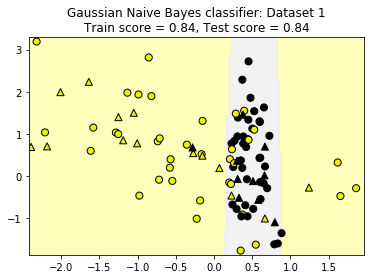

In [26]:
from sklearn.datasets import make_classification
X_C2,y_C2 = make_classification(n_samples = 100,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5,random_state=0)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
nbclf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(nbclf,X_train,y_train,X_test,y_test,'Gaussian Naive Bayes classifier: Dataset 1')

## crime example by using Gaussian

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)
nbclf = GaussianNB().fit(X_train,y_train)
print('Accuracy of train dataset is: {:.2f}'.format(nbclf.score(X_train,y_train)))
print('Accuracy of test dataset is: {:.2f}'.format(nbclf.score(X_test,y_test)))

Accuracy of train dataset is: 0.95
Accuracy of test dataset is: 0.94
